In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Latex ##Used to print latex formatted text

%matplotlib inline 
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
colnames = ['variance','skewness','curtosis','entropy','class'] ##List of column names of dataset
dataset = pd.read_csv('banknote.txt',names = colnames) ##Reads the dataset into Datafra,e
df = dataset[dataset['variance']<0]
print(df.shape)
dataset.head(100)
dataset.describe()

(608, 5)


,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [3]:
dataset['class'].replace(0,-1,inplace =True)##Converts Class labels from 0 to -1 as required for algorithm
dataset.head(25)
dataset.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,-0.110787
std,2.842763,5.869047,4.310030,2.101013,0.994207
min,-7.042100,-13.773100,-5.286100,-8.548200,-1.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,-1.000000
50%,0.496180,2.319650,0.616630,-0.586650,-1.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
duplicate = dataset[dataset.duplicated()] ##Checks if Duplicate Rows present
print('Original Dataset Shape :',dataset.shape)
if(len(duplicate)!=0):
    dataset.drop_duplicates(inplace = True) ## If duplicate rows are found then they are dropped
    print('Dataset Shape after removing duplicates :',dataset.shape)

Original Dataset Shape : (1372, 5)
Dataset Shape after removing duplicates : (1348, 5)


In [5]:
##Creates a held out Validation Set
validation = dataset.sample(frac=0.2582)
print('Validation Set Shape :',validation.shape)

Validation Set Shape : (348, 5)


In [6]:
##Forms Training Set by removing rows which are present in Validation Set

##We perform outer join on dataset and Validation Set and keep only those rows which only came from dataset
train = dataset.merge(validation, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']

train.drop('_merge',axis='columns',inplace = True) ## We drop the extra column '_merge' added during merge operation
print('Training Set Shape :',train.shape)
dataset.head(50)

Training Set Shape : (1000, 5)


,variance,skewness,curtosis,entropy,class
0,3.621600,8.66610,-2.80730,-0.446990,-1
1,4.545900,8.16740,-2.45860,-1.462100,-1
2,3.866000,-2.63830,1.92420,0.106450,-1
3,3.456600,9.52280,-4.01120,-3.594400,-1
4,0.329240,-4.45520,4.57180,-0.988800,-1
5,4.368400,9.67180,-3.96060,-3.162500,-1
6,3.591200,3.01290,0.72888,0.564210,-1
7,2.092200,-6.81000,8.46360,-0.602160,-1
8,3.203200,5.75880,-0.75345,-0.612510,-1
9,1.535600,9.17720,-2.27180,-0.735350,-1


#### Threshold parameter in below function is used to check covergence of weight vector. Suppose threshold value is 50 then if model has not made prediction mistake in last 51 consecutive iterations we consider that weights have converged.

In [7]:
##Perceptron Algorithm as per Lecture Slides

def percepalgo(X,Y,learn_rate,threshold):
    w = np.array([1,1,1,1]) ##Initialize Weight Vector
    nt = learn_rate ##Set Learning Rate
    count = 0 ##Used to keep Track for how many iterations our model has not made any prediction mistake
    k = threshold
    while(True):
        
        randint = np.random.randint(0,len(Y)) ##Generates a random integer to be used select a random (xn,yn) pair
        xn = np.array(X.iloc[randint])
        yn = Y.iloc[randint]
    
        if(yn * np.sum(w*xn) < 0): ##Checks whether model has made a prediction mistake. if yes, then model weights are updated
                                   ##and count is reset to 0. If No, then count is increased by 1
        
            w = w + nt*yn*xn
            count = 0
            
        else:
            count+=1
        
        if(count >k): ##Checks whether model has not made any mistakes in last k+1 (threshold value passed) iterations, if yes then weights
                      ##have converged and we stop the loop.
            break
      
       
    return w ##Returns the converged weight vector
        

In [8]:
##Function to make Predictions

def predictions(X,w): ##Takes parameters as input vector X and converged weight vector w
    
    y_pred = np.round(np.sum(X*w,axis = 1)) ##Performs row wise element wise product of weight vector and input vector and
                                            ##takes it sum and rounds to nearest integer.
    
    y_pred[y_pred >= 0]  = 1 ##If predicted y value is gretaer than or equal to 0 we store class label as 1
    y_pred[y_pred < 0]  = -1 ##If predicted y value is less than 0 we store class label as -1
   
    
    return y_pred ##Returns array of predicted class labels

In [9]:
##Function To calculate Error made by model. We have taken error function has percentage of misclassifications by model.

def error(yn,y_pred):
    count = 0
    for i in range(len(yn)):
        if(yn[i]!=y_pred[i]): ##Counts no of mistakes
            count+=1
    return((count/len(yn))*100) ##Returns percentage of mistake 

### We assume Learning Rate and Threshold as Hyperparameters and perform Cross Validation to fnd Weight Vector which gives minimum Average Error 

In [10]:
## We perform 10-Fold Cross validation to determine value of Hyperparameter Learning Rate

f = ['variance','skewness','curtosis','entropy'] 


hyperparams = [] ##List to store hyperparameter values and corresponding weight vector and error percent

for k in range(10,101,10): ##Loops over different threshold values from 10 to 100 in steps of 10
    for j in range(1,21): ##Loops over different values of Learing rate from 0.05 to 1 in steps of 0.05
   
        e = 0 ##Initialize error for particular current learning rate to 0
    
        w1 = np.array([0.0,0.0,0.0,0.0]) ##Array to store sum of weights for each fold in cross validation
    
        for i in range(0,10): ##loops over cross validation sets
       
            test = train[i*100:(i+1)*100] ##Splitted the training data into 9:1 ratio for train:test set
            train_cross = pd.concat([train[0:i*100],train[(i+1)*100:]])
            
            w = percepalgo(train_cross[f],train_cross['class'],0.05*j,k) ##Finds Converged weight vector over a training set and learning rate
        
            y_pred = predictions(np.array(test[f]),w) ##Calculates the predicted class labels for the test set using converged weigth vector from above
        
            e += error(np.array(test['class']),np.array(y_pred)) ##Calculates model error and adds it to overall error for a learning rate
        
            w1 += w ##Adds the current weight vector to overall weight vector for a learning rate
    
        hyperparams.append([k,0.05*j, w1/10 , e/10]) ##There is entry for each Threshold and Learning rate 
        
   
   



Error for Threshold  10  :  [ 6.6  7.5 17.2 15.2 13.1 13.4 15.6  8.9 16.5  7.7 12.4 10.8 15.7  8.6
 13.4  9.1 14.3 16.2 13.1 13.5]
Error for Threshold  20  :  [ 8.7  6.8  8.   8.8 14.  10.2  5.3  8.  11.4  9.   9.1  7.1  9.4  7.5
  8.3  8.2  7.8  6.9 10.3  7.3]
Error for Threshold  30  :  [3.8 5.4 5.2 9.2 5.6 5.1 6.1 5.  6.4 8.3 9.7 5.4 7.3 6.5 6.1 7.  5.3 6.7
 8.  6.1]
Error for Threshold  40  :  [3.3 5.3 5.3 4.8 5.2 5.7 5.7 5.8 9.2 6.9 7.5 5.8 6.8 5.9 6.3 7.1 6.5 6.4
 6.8 6.5]
Error for Threshold  50  :  [3.2 4.5 5.7 5.  5.5 5.9 5.5 5.  5.6 5.8 5.2 6.  5.9 5.5 6.1 5.4 5.1 5.1
 6.4 5.3]
Error for Threshold  60  :  [3.8 4.5 5.5 5.7 4.5 5.3 4.7 5.3 4.7 5.1 5.4 6.5 5.9 6.1 5.3 5.4 5.8 5.5
 4.8 5.7]
Error for Threshold  70  :  [3.3 4.3 4.3 5.7 5.3 4.9 5.4 5.8 5.5 7.1 5.3 5.8 5.3 5.1 5.3 4.8 5.6 5.3
 4.7 5.8]
Error for Threshold  80  :  [4.  3.8 4.4 5.2 4.4 5.9 5.1 4.6 5.  5.4 5.4 5.2 4.8 4.9 5.7 5.  5.2 5.8
 5.8 5.5]
Error for Threshold  90  :  [4.1 4.7 4.2 5.5 5.  4.4 4.6 4.7 4.7 5.8 4.5

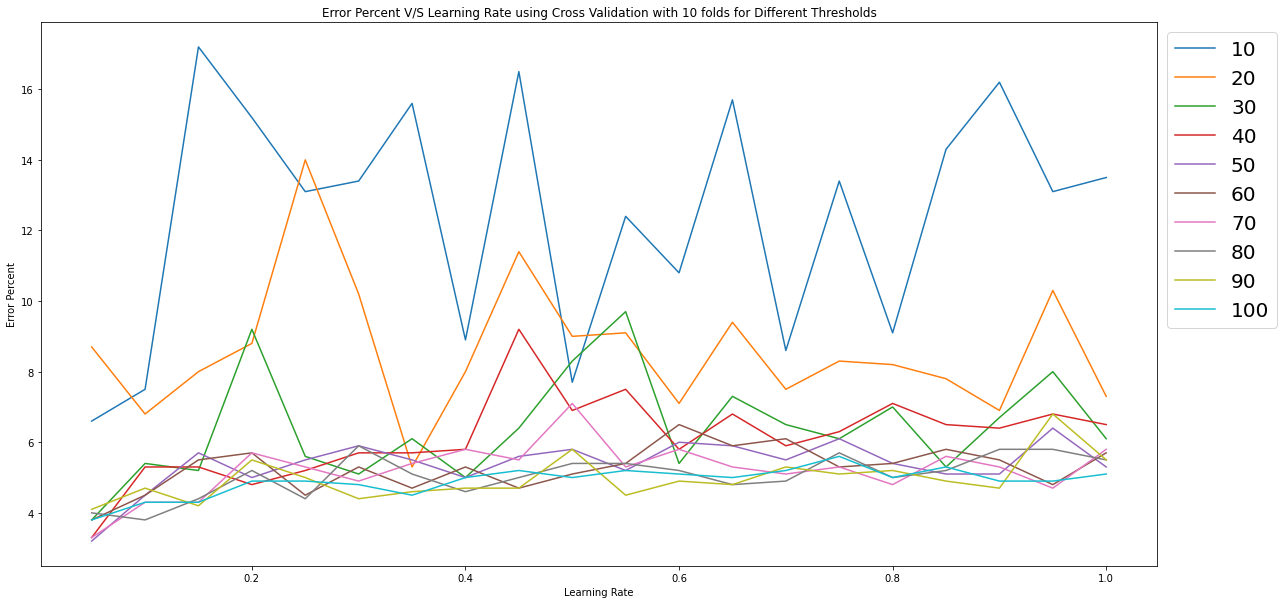

In [11]:
fig , ax = plt.subplots(1)


for k in range(10,101,10):
    
    values=np.array([h[3] for h in hyperparams if h[0] == k])
    print('Error for Threshold ',k,' : ',values)
    keys=np.array([h[1] for h in hyperparams if h[0] == k])
    ax.plot(keys, values,label=k)
    
    
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Error Percent')
ax.legend(bbox_to_anchor = (1, 1),prop= {'size' : 20})
ax.set_title('Error Percent V/S Learning Rate using Cross Validation with 10 folds for Different Thresholds')
print()

Error for Lerning Rate  0.05  :  [6.6 8.7 3.8 3.3 3.2 3.8 3.3 4.  4.1 3.8]
Error for Lerning Rate  0.1  :  [7.5 6.8 5.4 5.3 4.5 4.5 4.3 3.8 4.7 4.3]
Error for Lerning Rate  0.15  :  [17.2  8.   5.2  5.3  5.7  5.5  4.3  4.4  4.2  4.3]
Error for Lerning Rate  0.2  :  [15.2  8.8  9.2  4.8  5.   5.7  5.7  5.2  5.5  4.9]
Error for Lerning Rate  0.25  :  [13.1 14.   5.6  5.2  5.5  4.5  5.3  4.4  5.   4.9]
Error for Lerning Rate  0.3  :  [13.4 10.2  5.1  5.7  5.9  5.3  4.9  5.9  4.4  4.8]
Error for Lerning Rate  0.35  :  [15.6  5.3  6.1  5.7  5.5  4.7  5.4  5.1  4.6  4.5]
Error for Lerning Rate  0.4  :  [8.9 8.  5.  5.8 5.  5.3 5.8 4.6 4.7 5. ]
Error for Lerning Rate  0.45  :  [16.5 11.4  6.4  9.2  5.6  4.7  5.5  5.   4.7  5.2]
Error for Lerning Rate  0.5  :  [7.7 9.  8.3 6.9 5.8 5.1 7.1 5.4 5.8 5. ]
Error for Lerning Rate  0.55  :  [12.4  9.1  9.7  7.5  5.2  5.4  5.3  5.4  4.5  5.2]
Error for Lerning Rate  0.6  :  [10.8  7.1  5.4  5.8  6.   6.5  5.8  5.2  4.9  5.1]
Error for Lerning Rate  0.

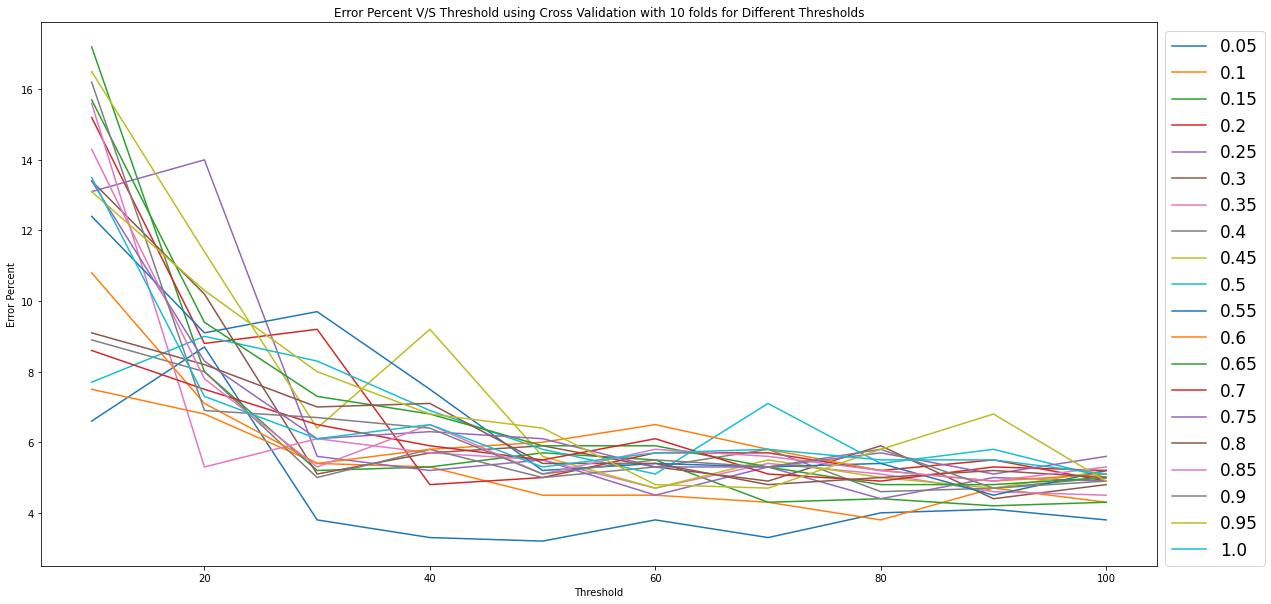

In [12]:
fig , ax = plt.subplots(1)


for k in range(1,21):
    
    values=np.array([h[3] for h in hyperparams if h[1] == 0.05*k])
    print('Error for Lerning Rate ',np.round(0.05*k,2),' : ',values)
    keys=np.array([h[0] for h in hyperparams if h[1] == 0.05*k])
    ax.plot(keys, values,label=np.round(0.05*k,2))
    
    
ax.set_xlabel('Threshold')
ax.set_ylabel('Error Percent')
ax.legend(bbox_to_anchor = (1, 1),prop= {'size' : 17})
ax.set_title('Error Percent V/S Threshold using Cross Validation with 10 folds for Different Thresholds')
print()

In [13]:
error_min = 100 ## We initialize minimum error to 100%
best_weight = np.array([]) ##Empty array to store Best Model weights
best_learnrate = 0 ##Stores the learning rate for which Average weight is minimum

for h in hyperparams:
    if(h[3] < error_min):
        
        error_min = h[3]
        best_weight = h[2]
        best_learnrate = h[1]
        best_threshold = h[0]


##Outputs the Best Model Parameters and corresponding learning rate and Threshold Value
print('Best Model weights : ',best_weight,'with average error of',error_min,'%')
print('Best Learning Rate is',best_learnrate,'and Best Threshold value is',best_threshold)

Best Model weights :  [-1.35172368 -0.7573566  -0.78024841 -0.56618929] with average error of 3.2 %
Best Learning Rate is 0.05 and Best Threshold value is 50


In [14]:
##Function to calculate F-Score for a target class

def fscorecalc(t,y_pred,yn):
    tp = fp = fn = tn = 0 ##Initialixe True Positive (tp) , True Negative (tn) , False Positive (fp) and False Negative (fn) to 0
    
    for i in range(len(y_pred)): ##For each prediction checks if predicted value and given value is same, if same then
                                 ##checks if predicted value is equal to target, if yes then True Positive else True Negative
                                 ##If predicted value and actual value are not same, then check if predicted value same as target 
                                 ##then False Positive else False Negative
        if(y_pred[i] == yn[i] ):
            if(y_pred[i] == t):
                tp+=1
            else:
                tn+=1
        else:
            if(y_pred[i]== t):
                fp+=1
            else:
                fn+=1
    
    print('True Positive :',tp,'\nFalse Positive :',fp,'\nTrue Negative :',tn,'\nFalse Negative :',fn)
    prec = tp / (tp + fp)    ##Precision is calculated as True Positive over sum of True Positive and False Positive
    
    recall = tp / (tp + fn)   ##Recall is claculated as True Positive over sum of True Positive and False Negative
    
    return (2*prec*recall) / (prec + recall) ##Returns F score which is calculated as harmonic mean of precision and recall
                

In [15]:
y_pred = predictions(np.array(validation[f]),best_weight) ##Calculates predictions for Validation Set data

print('\nError of Best Model on Validation Set is ',error(np.array(validation['class']),np.array(y_pred)),'%\n') ##Model Error

print('F Score for class 1 is',fscorecalc(1,y_pred,np.array(validation['class'])),'\n') ##F-Score for Class label '1'

print('F Score for class -1 is',fscorecalc(-1,y_pred,np.array(validation['class']))) ##F-Score for class label '-1'


Error of Best Model on Validation Set is  4.022988505747127 %

True Positive : 142 
False Positive : 8 
True Negative : 192 
False Negative : 6
F Score for class 1 is 0.9530201342281879 

True Positive : 192 
False Positive : 6 
True Negative : 142 
False Negative : 8
F Score for class -1 is 0.964824120603015
